In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset as netcdf_dataset
import netCDF4 as nc


%matplotlib inline

In [2]:
data = nc.Dataset('Dataset Raw/ncum_imdaa_reanl_HR_TMP-2m_1979010100-1979121500.nc', mode ='r')
print(type(data)) # print the type of the data 
print(data.variables.keys()) # print the variables in the data

<class 'netCDF4._netCDF4.Dataset'>
dict_keys(['time', 'longitude', 'latitude', 'TMP_2m'])


In [3]:
# Spatial information
lats = data.variables['latitude'][:]  
longs = data.variables['longitude'][:]
# Temporal information
time = data.variables['time'][:]
temp = data.variables['TMP_2m'][:]

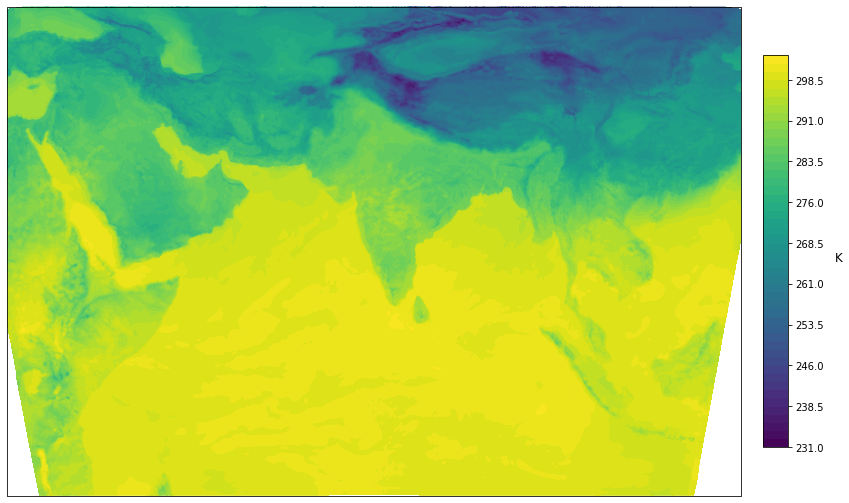

In [6]:
# loop for 365 days 
days = np.arange(0,5)
# creating meshgrid from our list of spatial coordinates
lon, lat = np.meshgrid(longs,lats)
fig = plt.figure(figsize=(20,9))
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.coastlines()
#ax.set_title('Temperature for day '+ str(i+1))
    
# generate the contour map
plt.contourf(longs, lats, temp[0,], 60,
transform=ccrs.PlateCarree())
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)
# save the figure and give a pause for visualization
#plt.savefig(f’./output/{i+1}.jpg)
plt.pause(1)
plt.show()